# **Molecular dynamics(lennard jones interaction)**

# Question1-System's Trajectory

## initial values

In [11]:
#making the initial position: initial condition 1: particles are in a cristal format at the left of  the system(the size of the system is 20* 10 s0 we set everything in a 10*10 box)
N=100 #number of particles
x=[]
for i in range(0,10,1):
    x.append(i)
position=[]
y=0


for m in range(10):
    for i in x:
        position.append((i,y))
    y+=1


#initial condition 2:making the initial velocity: initial condition 1: the velocity should be random
import numpy as np

initial={}
for i in range(len(position)):
    #velocity
    vx=np.random.rand()
    vy=np.random.rand()
    initial[position[i]]=[vx,vy]

#initial condition 3: the center of the mass velocity should be 0 so i will make the mean = 0

meanx=0
meany=0
for m in range(len(list(initial.values()))):
        meanx+=list(initial.values())[m][0] #vx #list(initialv.values())[num of values][0:vx or 1:vy]
        meany+=list(initial.values())[m][1] #vy
avgVX=meanx/len(initial)
avgVY=meany/len(initial)



for i in initial:
    initial[i]=[initial[i][0]-avgVX,initial[i][1]-avgVY]

print("initial condition of the particles ({position(X,Y): velocity[vx,vy]}) = ",initial)


initial condition of the particles ({position(X,Y): velocity[vx,vy]}) =  {(0, 0): [0.1848854235756724, -0.06785772544017504], (1, 0): [-0.06711759846554033, 0.09483344570441293], (2, 0): [0.3753254095532482, 0.12227451960237151], (3, 0): [-0.13397135069803512, -0.3284647200126782], (4, 0): [-0.0675175150474362, -0.274411804116286], (5, 0): [-0.14762441618003574, 0.22303825466469923], (6, 0): [0.16392688355476015, -0.3212611873436522], (7, 0): [-0.13301492636213708, -0.022185629866360024], (8, 0): [-0.0661675556975081, -0.38502623126554064], (9, 0): [0.059911870575031556, -0.14426071027523962], (0, 1): [0.10203947371634381, 0.07108375006345352], (1, 1): [-0.14427006517703655, -0.38224164860757986], (2, 1): [-0.4866943348050392, -0.4028526030179988], (3, 1): [-0.05270147873371844, 0.09381839505586403], (4, 1): [-0.1595184825318039, 0.035023685407781724], (5, 1): [0.35014278882901795, 0.21188278240812936], (6, 1): [0.017019844147115992, -0.4030281267636055], (7, 1): [0.3200792005189611, 0

## force (lenard jones molecular interaction)

In [12]:
# V(r)=ε(1/r^12 - 1/r^6) -> F=-∇V -> fx=-(x1-x0)(-12/r^13 + 6/r^7)/r  /  fy=-(y1-y0)(-12/r^13 + 6/r^7)/r 
#in reduced dinmention we got ε =1
#rc=3 : in molecular dynamics usually the rc (the threshold we put for the length of particles that have a force on the initial particle) is 3 so beyond that we will cut off the force
def particleforce (position,rc):
    force=np.zeros((N, 2))
    for j in range(len(position)):
        for m in range(len(position)):
            x0=position[j][0] #X0
            y0=position[j][1] #Y0
            x1=position[m][0] #X1
            y1=position[m][1] #Y1
            #force (lenard jones molecular interaction)
            dx=np.min([abs(x0-x1),(10-abs(x0-x1))]) #walls are periodic
            dy=np.min([abs(y0-y1),(10-abs(y0-y1))])
            r=np.sqrt(dx**2+dy**2)
            if r<=rc and r>.001: #the cut-off
                samepart=-(-12/r**13 + 6/r**7)/r
                force[j,0]+=float(dx*samepart)
                force[j,1]+=float(dy*samepart)
    force=np.array(force)
    return force



## Kinetic & Potential Energy (needed for question 2- conservation of the energy) 

In [13]:
#E=kE+PE

#Kinetic Energy
def kinetic_energy(velocity):
    KE=0
    #m=1
    for i in velocity:
        KE+=0.5*(i[0]**2+i[1]**2)
    return KE

#Potential Energy
def potential_energy(position,rc):
    PE=0
    #m=1
    for j in range(len(position)):
        for m in range(len(position)):
            x0=position[j][0] #X0
            y0=position[j][1] #Y0
            x1=position[m][0] #X1
            y1=position[m][1] #Y1
            #force (lenard jones molecular interaction)
            dx=np.min([abs(x0-x1),(10-abs(x0-x1))])
            dy=np.min([abs(y0-y1),(10-abs(y0-y1))])
            r=np.sqrt(dx**2+dy**2)
            s,ε=1,1
            if r<=rc and r>.001: #the cut-off
                    PE+= 4*ε*((s/r)**12-(s/r)**6)
    return PE


## Trajectory

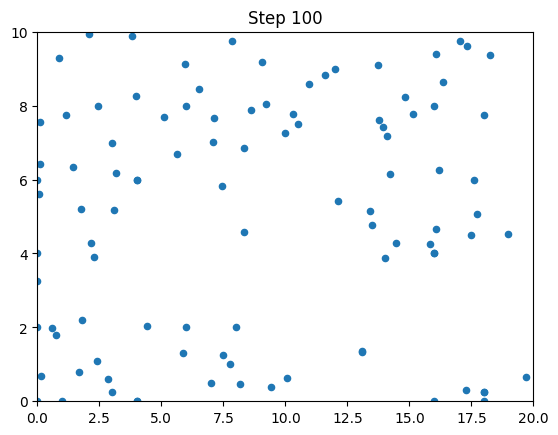

In [14]:
# to find the trajectory we need to solve F=ma but the equation is too complicated so we use verlet method to reduce the computational cost
# verlet method: v_n = (x_{n+1} - x_{n-1}) /2Δt (this is the subtraction of the x_{n+1} & x_{n-1} taylor expansion terms)
# after a few steps we get : #x_{n+1}= x_n + v_n Δt + 1/2 a_n Δt^2    &    v_{n+1}= v_n + 1/2 (a_{n+1} + a_n) Δt

#for simplicity  we take the mass of the particles m=1

#making the r
position=[]
for i in initial:
    position.append(i)
r=[]
for j in range(len(position)):
    r.append([position[j][0],position[j][1]]) #so we get [[x1, y1], [x2, y2],...]
r = np.array(r, dtype=float)


#making the v
v=[]
for s in initial:
    v.append(initial[s])
v=np.array(v)


#making the state of the system in each step 
step=100 #the number of steps 
dt=0.01 #the lenth of each step 
rc=3 
#the dimension of the box: 
lx=20 
ly=10 
trajectory=[r.copy()]
E=[]
T=[]
steps_velocity=[v]
pressure=[]
for i in range(step):
    f=particleforce(r,rc)
    r+=v*dt + 0.5*f*(dt**2)
    #the boundry condition is periodic: 
    r[:,0]%=lx #x
    r[:,1]%=ly #y
    f2=particleforce(r,rc)
    v+=0.5*(f2 + f)*dt
    trajectory.append(r.copy())
    #total energy for Q2
    pe=potential_energy(r,rc)
    ke=kinetic_energy(v)
    E.append(pe+ke)
    #saving each step's velocity for the Q3
    steps_velocity.append(v.copy())
    #Temp for the Q4
    temp=ke/(2*N)
    T.append(temp)
    #pressure for the Q4
    w=0
    for j in range(r.shape[0]):
        for m in range(r.shape[0]):
            x0=r[j][0] #X0
            y0=r[j][1] #Y0
            x1=r[m][0] #X1
            y1=r[m][1] #Y1
            #force (lenard jones molecular interaction)
            dx=np.min([abs(x0-x1),(10-abs(x0-x1))])
            dy=np.min([abs(y0-y1),(10-abs(y0-y1))])
            R=np.sqrt(dx**2+dy**2)
            if R<=rc and R>.001: #the cut-off
                fx=-dx*(-12/R**13 + 6/R**7)/R
                fy=-dy*(-12/R**13 + 6/R**7)/R 
                w+=fx*dx+fy*dy
    volume=lx*ly
    p=N*temp/volume+w/(2*N) #we are in the 2D space so we the "2" coefficient 
    pressure.append(p)


#making the GIF of the trajectory
#the last step overview
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

fig, ax = plt.subplots()  
scat = ax.scatter([], [], s=20)
ax.set_xlim(0, lx)  #set x-axis limits to match the simulation box
ax.set_ylim(0, ly) 

#the animation as GIF
def initialization():
    scat.set_offsets(np.empty((0, 2)))
    return scat,

def update(frame):
    positions = trajectory[frame]  #Get each particle position at current frame
    scat.set_offsets(positions)  #updating scatter plot positions
    ax.set_title(f"Step {frame}")
    return scat,

anim = FuncAnimation(fig, update, frames=len(trajectory), init_func=initialization, blit=True)
anim.save("displacement_trajectory.gif", writer='pillow', fps=5)
plt.show()


## GIF of trajectory

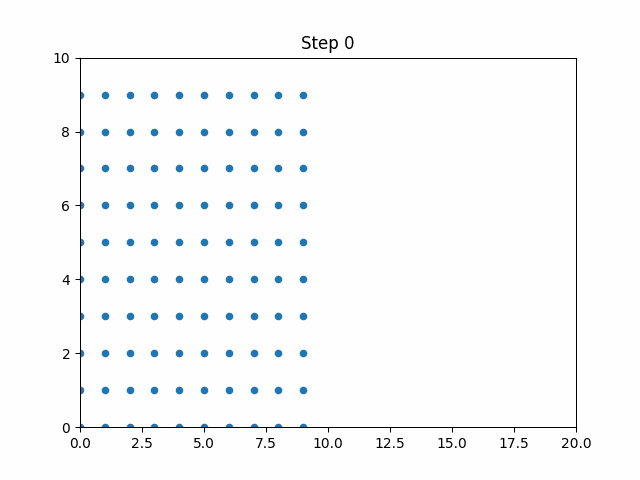

In [15]:
from IPython.display import Image
Image(filename="displacement_trajectory.gif")

# Question 2 - the Conservation of energy

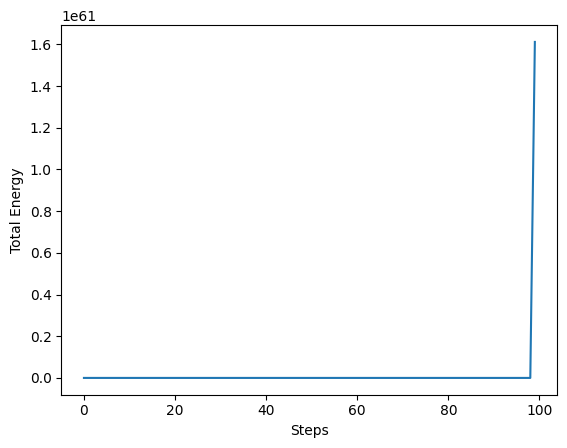

In [16]:
import matplotlib.pyplot as plt
steps=[]
for i in range(step):
    steps.append(i)
plt.plot(steps,E)
plt.ylabel("Total Energy")
plt.xlabel("Steps")
plt.show()

# Question 3 - auto correlation function & the equilibration time

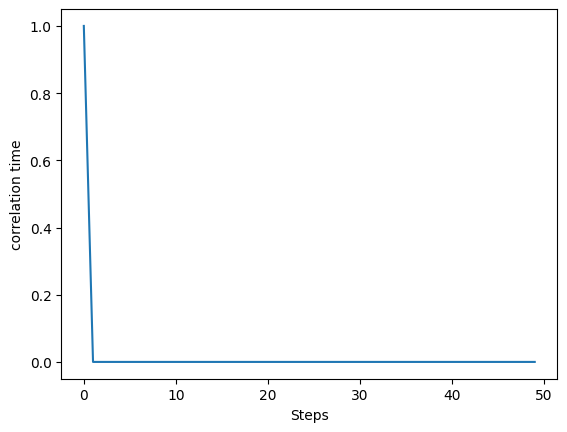

the equilibration time= 1


In [17]:
#auto correlation function
correlationtime=[]
for i in range(step//2): #the time between the same particle in two different time to find the correlation
    ct=0
    iteration=0
    for j in range(len(steps_velocity)):
        if j+i<len(steps_velocity):
            for m in range(N): #the num of particles
                ct+= (steps_velocity[j][m][0]*steps_velocity[j+i][m][0])+(steps_velocity[j][m][1]*steps_velocity[j+i][m][1])
                iteration+=1
    correlationtime.append(ct/iteration)
correlationtime=np.array(correlationtime)

correlationtime=correlationtime/correlationtime[0] #normalazition
lag=[]
for l in range(step//2):
    lag.append(l)


plt.plot(lag,correlationtime)
plt.ylabel("correlation time")
plt.xlabel("Steps")
plt.show()

#the equilibration time
a=0
for i in range(correlationtime.shape[0]):
    if correlationtime[i]<0.01:
        print("the equilibration time=", i)
        a=1
        break
if a==0:
    print("there's no equilibration time")

# Question 4-temperature and pressure of system in equilibrium

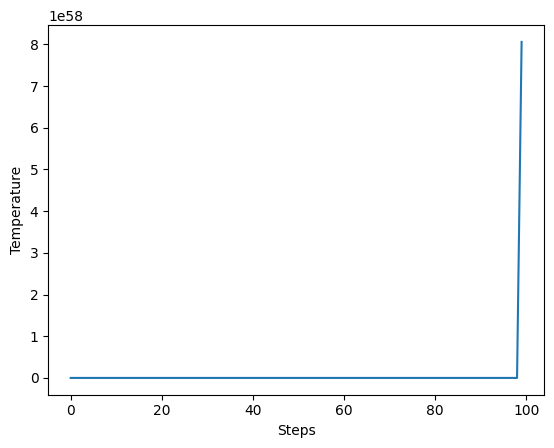

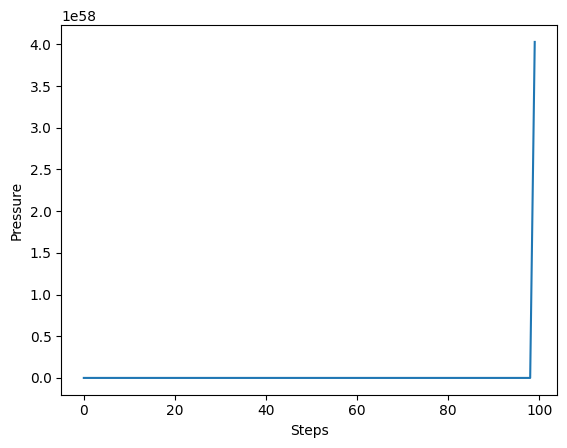

In [18]:
#temp
import matplotlib.pyplot as plt
steps=[]
for i in range(step):
    steps.append(i)
plt.plot(steps,T)
plt.ylabel("Temperature")
plt.xlabel("Steps")
plt.show()

#pressure
plt.plot(steps,pressure)
plt.ylabel("Pressure")
plt.xlabel("Steps")
plt.show()

# Question 5 - diffusion coefficient

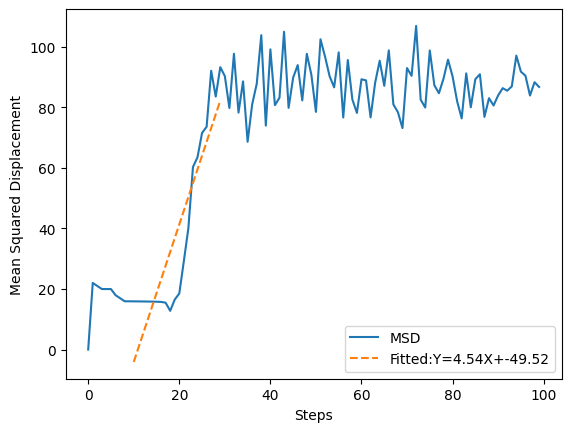

diffusion coefficient =  1.1356691319821246


In [19]:
newtrajectory=[]
for i in range(len(trajectory)):
    newtrajectory.append(np.array(trajectory[i])-np.array(trajectory[0]))

msd=[]
for j in newtrajectory: #steps
    dr=0
    for k in j: #particles
        dr+=k[0]**2+k[1]**2 #x or y 
    msd.append(dr/100)

#fitting a line so we can make the D by slope
import numpy as np
import matplotlib.pyplot as plt

start,end=10,30
fitted_x=np.array(steps[start:end])
fitted_y=np.array(msd[start:end])

#the area that it's linear(diffusion is occuring)
slope,intercept=np.polyfit(fitted_x, fitted_y,1)
line=slope*fitted_x+intercept

plt.plot(steps,msd[:-1],label='MSD')
plt.plot(fitted_x,line,'--',label=f'Fitted:Y={slope:.2f}X+{intercept:.2f}')
plt.xlabel("Steps")
plt.ylabel("Mean Squared Displacement")
plt.legend()
plt.show()

diffusion_coefficient=slope/4
print("diffusion coefficient = ",diffusion_coefficient)